In [1]:
from dataAcquisition import DataAcquisition
from EDA import EDA
from dataPreprocessing import DataPreprocessing
from modelTraining import ModelTraining
import pandas as pd
from keras.datasets import mnist
import numpy as np

%load_ext autoreload
%autoreload 2


In [2]:
data_acquirer = DataAcquisition()

# train_X, test_X, train_y, test_y = data_acquirer.acquire_data()
# X_train = pd.read_csv("data/X_train.csv")
# y_train = pd.read_csv("data/y_train.csv")
# X_test = pd.read_csv("data/X_test.csv")
# y_test = pd.read_csv("data/y_test.csv")

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Exploratory Data Analysis

In [3]:
# eda = EDA()
#
# eda.plot(y_train, y_test, plot_type="classes_bar_plot")
# eda.plot(X_train, y_train, plot_type="display_images")
# stats = eda.descriptive_statistics(X_train)
# print(stats.head)
# constant_training_pixels = eda.find_constant_pixels(X_train)
# constant_testing_pixels = eda.find_constant_pixels(X_test)
# print(f"Constant Pixels in Training Set: {constant_training_pixels}")
# print(f"Constant Pixels in Testing Set: {constant_testing_pixels}")

# Data Preprocessing

In [4]:
# preprocessor = DataPreprocessing()
#
# X_train_pca, X_test_pca = preprocessor.dimensionality_reduction(X_train, X_test, 0.8)
# print(f"b: {preprocessor.num_components_before}, a: {preprocessor.num_components_after}")
# preprocessor.plot(X_train, X_train_pca, y_train, plot_type='pca_images')
# preprocessor.plot(plot_type="eigenfaces")

# Model Training

In [4]:
model_trainer = ModelTraining(X_train, y_train, X_test, y_test)

nn = model_trainer.neural_network()
# svm = model_trainer.support_vector_machine()





(60000, 28, 28)
(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 271,670
Trainable params: 271,670
Non-trainable params: 0
_______________

C:\Users\kuryl_ekdrvd0\PycharmProjects\AI-MNIST-Pipeline\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
938/938 [==============================] - 16s 15ms/step - loss: 4.3798 - accuracy: 0.7768 - val_loss: 1.2455 - val_accuracy: 0.8918

In [5]:
nn.save('basic_mnist_nn.h5')

b'iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAAAAABXZoBIAAAAxUlEQVR4nGNgGDaAEUKFpD77sfTFHeyS9xQYGBg+X4UKPuk6w8DAwMDAAuGm6l/TMnSweCzLwPDntSTDozPIOhkYGBgYBA3PmDIw/Lh1XShnGi5nBP+9KIRLTuzl/2AokwlDMlv0/U1cGq1//rPDJcfQ+m83Ky45zrM/rHBqrPu3Daec9+8PlrjkhO/+W4ZLjvn0v9vKuCTV/v3zxSUn/+BfMSMuydZ//0xwydl+QpdEClsbHoa7X1AkWZA5F53f4TIWEwAAaRE8kJuHrgAAAAAASUVORK5CYII='

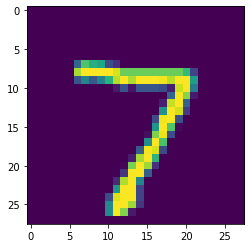

In [22]:
import matplotlib.pyplot as plt
import base64
from PIL import Image
from io import BytesIO
plt.imshow(X_test[0])
x = Image.fromarray(X_test[0])
in_mem_file = BytesIO()
x.save(in_mem_file, format='PNG')
in_mem_file.seek(0)
img_bytes =in_mem_file.read()
base64.b64encode(img_bytes)


Balanced dataset -> chosen metric will be accuracy, no need for F1


Not removing highly correlated features as we would normally because
since the feature-set is composed of pixel-based features, neighbouring
pixels will likely have a high correlation - meaning we would need to
remove a lot which would end up destroying a large chunk of the image.



